In [3]:
library(rethinking)

In [5]:
data(Howell1)
d <- Howell1

# 1

In [11]:
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
height,138.2635963,27.6024476,81.108550,165.73500,▁▁▁▁▁▁▁▂▁▇▇▅▁
weight,35.6106176,14.7191782,9.360721,54.50289,▁▂▃▂▂▂▂▅▇▇▃▂▁
age,29.3443934,20.7468882,1.000000,66.13500,▇▅▅▃▅▂▂▁▁
male,0.4724265,0.4996986,0.000000,1.00000,▇▁▁▁▁▁▁▁▁▇


In [28]:
d1 <- d[d$age > 18, ]
xbar <- mean(d1$weight)

flist <- alist(
    height ~ dnorm(mu, sigma),
    mu ~ a + b * (weight - xbar),
    a ~ dnorm(178, 20),
    b ~ dlnorm(0, 1), 
    sigma ~ dunif(0, 50)
)

m1 <- quap(flist, data=d1)

precis(m1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,154.6494211,0.27465521,154.2104691,155.0883732
b,0.9047403,0.04260886,0.8366431,0.9728375
sigma,5.1093591,0.19422742,4.7989461,5.4197720


In [55]:
post <- extract.samples(m1)
mu_height <- c()
interval.89 <- list()
i = 1
for (w in c(45, 40, 65, 31, 53)){
    height <- post$a + post$b * (w - xbar)    
    print(w)
    print(mean(height))
    print(PI(height))
    }

[1] 45
[1] 154.6084
      5%      94% 
154.1704 155.0504 
[1] 40
[1] 150.0856
      5%      94% 
149.5292 150.6341 
[1] 65
[1] 172.6997
      5%      94% 
171.2810 174.1066 
[1] 31
[1] 141.9445
      5%      94% 
140.8938 142.9884 
[1] 53
[1] 161.845
      5%      94% 
161.1490 162.5345 


In [63]:
weight.seq <- seq(20, 70, by=1)
sim.height <- sim(m1, data=list(weight=weight.seq))

# 2

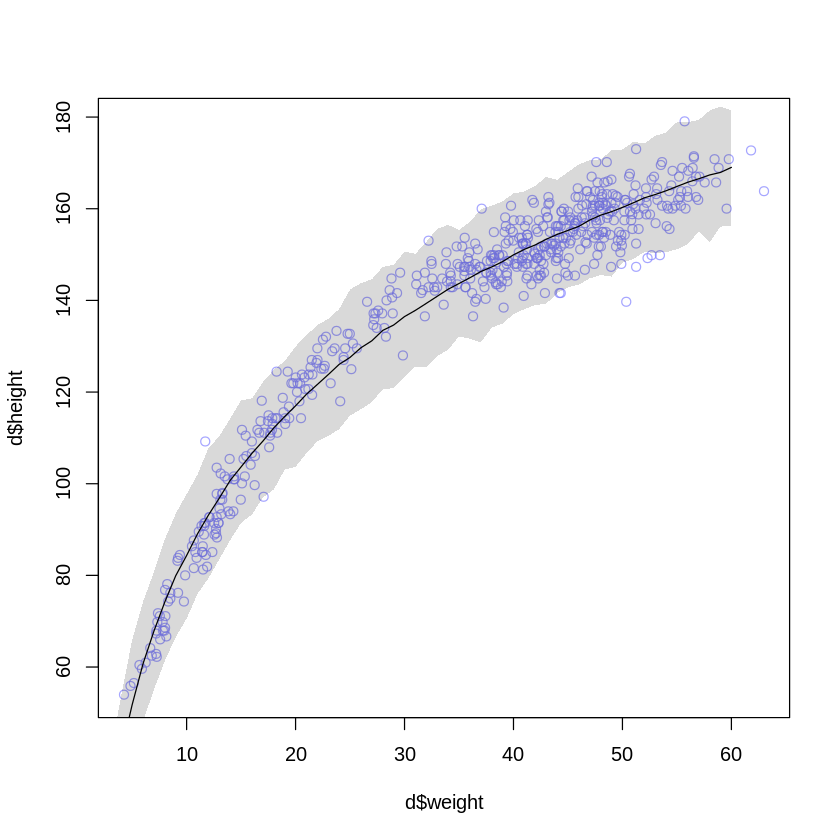

In [66]:
d$log_weight <- log(d$weight)
xbar <- mean(d$log_weight)
m2 <- quap(
alist(
height ~ dnorm( mu , sigma ) ,
mu <- a + b*( log_weight - xbar ) ,
a ~ dnorm( 178 , 20 ) ,
b ~ dlnorm( 0 , 1 ) ,
sigma ~ dunif( 0 , 50 )
) ,
data=d )
plot( d$weight , d$height , col=col.alpha(rangi2,0.7) )
x_seq <- log(1:60)
mu <- sim( m2 , data=list(log_weight=x_seq) )
mu_mean <- apply(mu,2,mean)
mu_ci <- apply(mu,2,PI,0.99)
lines( exp(x_seq) , mu_mean )
shade( mu_ci , exp(x_seq) )

# 3

In [70]:
d$weight_s <- (d$weight - mean(d$weight)) / sd(d$weight)
d$weight_s2 <- d$weight_s ^ 2

m <- quap(
    alist(
        height <- dnorm(mu, sigma), 
        mu <- a + b1 * weight_s + b2 * weight_s2,
        a <- dnorm( 178, 20),
        b1 <- dlnorm(0, 1),
        b2 <- dnorm(0, 1),
        sigma <- dunif(0, 50)
    ),
    data=d)

precis(m)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,146.057413,0.3689756,145.467719,146.647107
b1,21.733043,0.2888890,21.271343,22.194743
b2,-7.803277,0.2741838,-8.241475,-7.365078
sigma,5.774474,0.1764651,5.492449,6.056500


In [71]:
prior <- extract.prior(m)
precis(prior)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
a,178.00798524,19.863711,145.6748673,209.087672,▁▁▃▇▇▂▁▁
b1,1.66917548,2.236189,0.2054129,5.301411,▇▁▁▁▁▁▁▁▁▁▁▁▁▁
b2,0.07308688,1.013317,-1.5407890,1.715908,▁▁▁▁▂▅▅▇▅▂▂▁▁▁▁
sigma,24.51065472,14.566588,2.4772484,46.846331,▇▇▇▇▇▇▇▇▇▇


In [74]:
w_seq <- seq( from=min(d$weight_s) , to=max(d$weight_s) ,
length.out=50 )
w2_seq <- w_seq^2
mu <- link( m , post=prior , data=list( weight_s=w_seq , weight_s2=w2_seq ) )


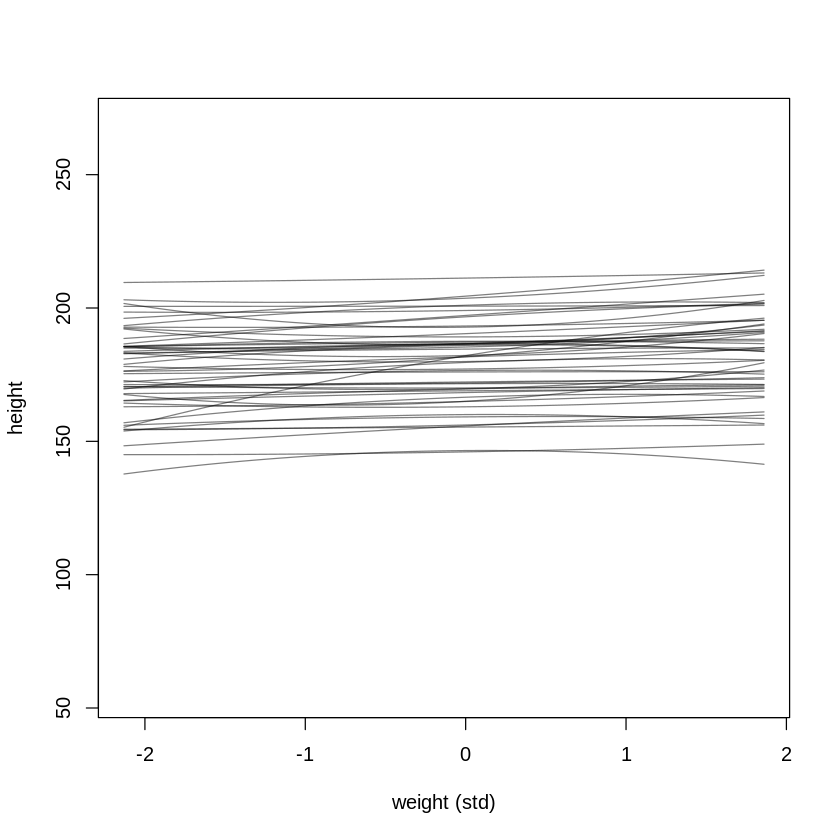

In [76]:
plot( NULL , xlim=range(w_seq) , ylim=c(55,270) , xlab="weight (std)" , ylab="height" )
for ( i in 1:50 ) lines( w_seq , mu[i,] , col=col.alpha("black",0.5) )